In [7]:
import numpy as np
from matplotlib import pyplot as plt
from io import StringIO
import pandas as pd
from pathlib import Path
import seaborn as sns
from ccb.experiment import parse_results
from ccb.experiment.retrieve_runs import retrieve_runs

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Main Restults

  0%|          | 0/2987 [00:00<?, ?it/s]

/mnt/home/dev/climate-change-benchmark/ccb/experiment/parse_results.py:333: UserWarning: Not enough steps in /mnt/data/experiments/nils/final_classification_seeded_runs/1.00x_train_classification_v0.7_10-10-2022_18:41:05_resnet18/forestnet_v1.0/seed_1/csv_logs/version_0. len(trace_dict['val_metric']) = 8.
  
/mnt/home/dev/climate-change-benchmark/ccb/experiment/parse_results.py:333: UserWarning: Not enough steps in /mnt/data/experiments/nils/final_classification_seeded_runs/0.20x_train_classification_v0.7_10-18-2022_08:45:26_ssl_moco_resnet18/pv4ger_classification/seed_0/csv_logs/version_0. len(trace_dict['val_metric']) = 4.
  
/mnt/home/dev/climate-change-benchmark/ccb/experiment/parse_results.py:241: UserWarning: File not found: /mnt/data/experiments/nils/final_classification_seeded_runs/0.20x_train_classification_v0.7_10-18-2022_11:34:06_ssl_moco_resnet18/brick_kiln_v1.0/seed_0/csv_logs/version_0/metrics.csv
  warn(f"File not found: {Path(log_dir) / 'metrics.csv'}")
/mnt/home/dev/cl

['resnet18' 'swinv2_tiny_window16_256' 'vit_small_patch16_224' 'resnet50'
 'conv4' 'millionaid_resnet50' 'ssl_moco_resnet50' 'ssl_moco_resnet18'
 'vit_tiny_patch16_224' 'convnext_base']


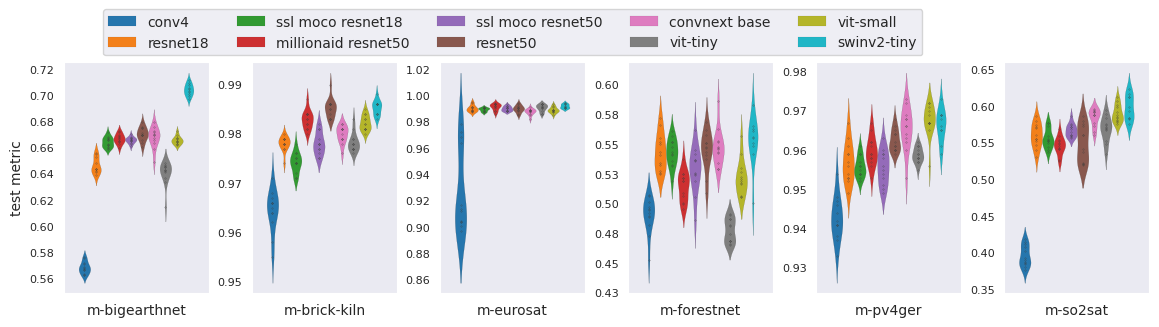

In [8]:
classification_dir = '/mnt/data/experiments/nils/final_classification_seeded_runs'

df = retrieve_runs(classification_dir, use_cached_csv=True, is_sweep=False)

print(df.model.unique())

# df['train_ratio'] = [get_train_ratio(part_name) for part_name in df['partition_name']]
df = df.applymap(parse_results.clean_names)
df = df.rename(columns=parse_results.clean_names)

model_order = "conv4,resnet18,ssl moco resnet18,millionaid resnet50,ssl moco resnet50,resnet50,convnext base,vit-tiny,vit-small,swinv2-tiny".split(",")
df_1x = df[(df["partition name"] == "1.00x train") | (df["partition name"] == "default")].copy()
# df_1x = df[(df["partition name"] == "0.05x train")].copy()

normalizer = parse_results.make_normalizer(df_1x)
normalizer.normalize_data_frame(df_1x, ["test metric", "val metric"])

parse_results.plot_per_dataset_3(df_1x, model_order, metric="test metric", sharey=False, inner="points", fig_size=(14,3), n_legend_rows=2)
plt.savefig(Path.home() / "figures" / "test metric.pdf", bbox_inches="tight", dpi=300)
# parse_results.plot_per_dataset_3(df_1x, model_order, metric="val metric", sharey=False, inner="points")
# plt.savefig(Path.home() / "figures" / "test metric.png", bbox_inches="tight", dpi=300)

# parse_results.plot_per_dataset_3(df_1x, model_order, metric="test loss", sharey=False, inner="points")
# parse_results.plot_per_dataset_3(df_1x, model_order, metric="val loss", sharey=False, inner="points")


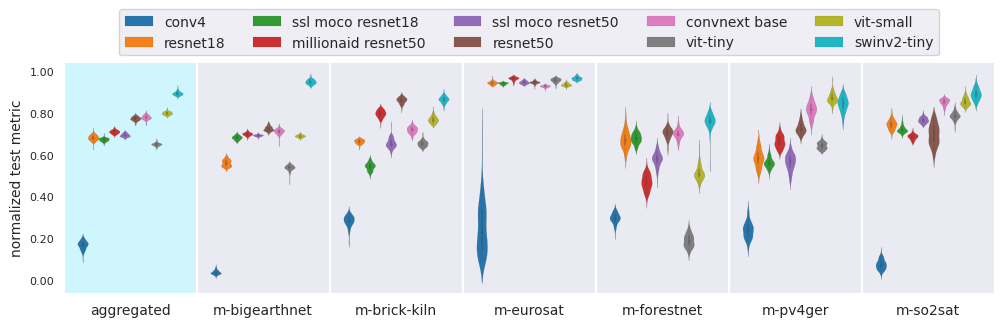

In [9]:
parse_results.plot_bootstrap_aggregate(df_1x, metric="normalized test metric", model_order=model_order, fig_size=(12,3))
# parse_results.plot_bootstrap_aggregate(df_1x, metric="normalized val_metric", model_order=model_order)
plt.savefig(Path.home() / "figures" / "normalized test metric.pdf", bbox_inches="tight", dpi=300)

# Train Size Analysis

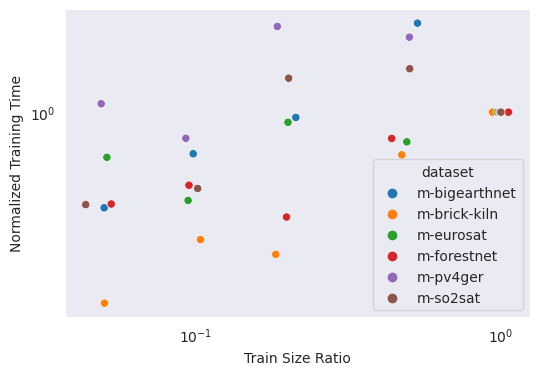

In [6]:
classification_dir = '/mnt/data/experiments/nils/final_classification_seeded_runs'
df = retrieve_runs(classification_dir, use_cached_csv=True, is_sweep=False)
df = df.applymap(parse_results.clean_names)
df = df.rename(columns=parse_results.clean_names)

plt.figure(figsize=(6,4), dpi=100)
parse_results.plot_normalized_time(df, average_seeds=True, reference_ratio=1.0)
# plt.savefig(Path.home() / "figures" / "training time.png", bbox_inches="tight")


m-forestnet
m-bigearthnet
m-so2sat
m-brick-kiln
m-eurosat
m-pv4ger


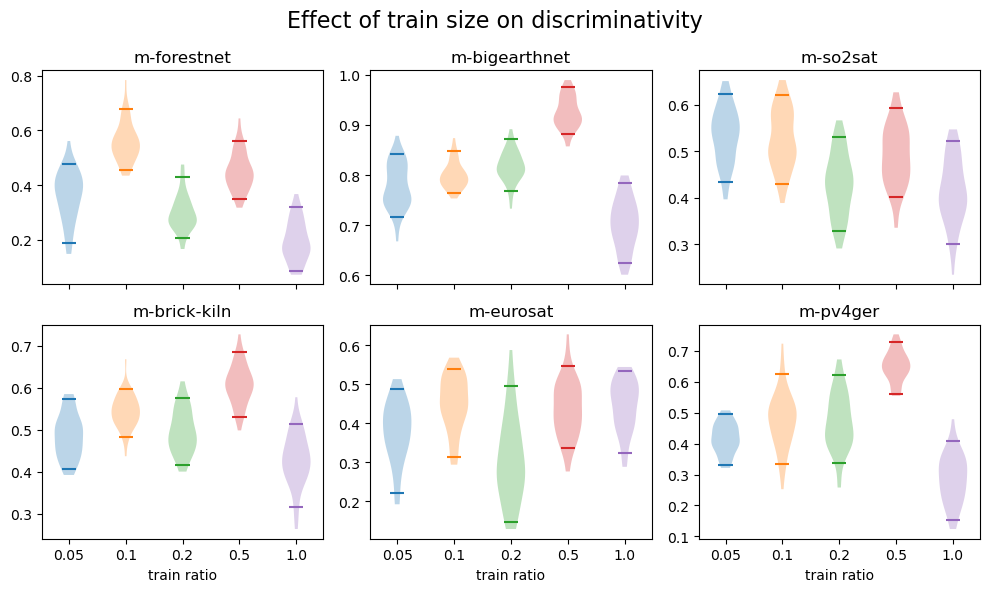

In [19]:
df_filtered = df[~df.model.isin(("conv4", "millionaid resnet50", "ssl moco resnet18", "ssl moco resnet50", "vit-tiny"))]

parse_results.plot_discriminative_metric(df_filtered, metric="val metric", n_largest=100, fig_size=(10,6))
plt.savefig(Path.home() / "figures" / "discriminativity.png", bbox_inches="tight")


In [4]:
parse_results.count_exp(df)

model                         conv4  convnext base  millionaid resnet50  \
dataset       partition name                                              
m-bigearthnet 0.05x train       NaN           12.0                  NaN   
              0.10x train       NaN           12.0                  NaN   
              0.20x train       NaN           12.0                  NaN   
              0.50x train      12.0           12.0                  NaN   
              1.00x train      12.0           12.0                 12.0   
m-brick-kiln  0.05x train       NaN           12.0                  NaN   
              0.10x train       NaN           12.0                  NaN   
              0.20x train       NaN           12.0                  NaN   
              0.50x train      12.0           12.0                  NaN   
              1.00x train      12.0           12.0                 12.0   
m-eurosat     0.05x train       NaN           12.0                  NaN   
              0.10x train       NaN           12.0                  NaN   
              0.20x train       NaN           12.0                  NaN   
              0.50x train      12.0           12.0                  NaN   
              1.00x train      12.0           12.0                 12.0   
m-forestnet   0.05x train       NaN           12.0                  NaN   
              0.10x train       NaN           12.0                  NaN   
              0.20x train       NaN           12.0                  NaN   
              0.50x train      12.0           12.0                  NaN   
              1.00x train      12.0           12.0                 12.0   
m-pv4ger      0.05x train       NaN           12.0                  NaN   
              0.10x train       NaN           12.0                  NaN   
              0.20x train       NaN           12.0                  NaN   
              0.50x train      12.0           12.0                  NaN   
              1.00x train      12.0           12.0                 12.0   
m-so2sat      0.05x train       NaN           12.0                  NaN   
              0.10x train       NaN           12.0                  NaN   
              0.20x train       NaN           12.0                  NaN   
              0.50x train      12.0           12.0                  NaN   
              1.00x train      12.0           12.0                 12.0   

model                         resnet18  resnet50  ssl moco resnet18  \
dataset       partition name                                          
m-bigearthnet 0.05x train         12.0      12.0                NaN   
              0.10x train         12.0      12.0                NaN   
              0.20x train         12.0      12.0                NaN   
              0.50x train         12.0      12.0               12.0   
              1.00x train         10.0      12.0               12.0   
m-brick-kiln  0.05x train         12.0      12.0                NaN   
              0.10x train         12.0      11.0                NaN   
              0.20x train         12.0      12.0                NaN   
              0.50x train         12.0      12.0               12.0   
              1.00x train         12.0      12.0               12.0   
m-eurosat     0.05x train         12.0      10.0                NaN   
              0.10x train         11.0      12.0                NaN   
              0.20x train         12.0      12.0                NaN   
              0.50x train         12.0      12.0               12.0   
              1.00x train         12.0      12.0               12.0   
m-forestnet   0.05x train         12.0      12.0                NaN   
              0.10x train         12.0      12.0                NaN   
              0.20x train         12.0      12.0                NaN   
              0.50x train         12.0      12.0               12.0   
              1.00x train         12.0      12.0               12.0   
m-pv4ger      0.05x train         12.

In [14]:
df["partition name"].unique()


array(['1.00x train', '0.50x train', '0.20x train', '0.10x train',
       '0.05x train'], dtype=object)

In [4]:
df.step

0          125
1       239997
2       241247
3       263435
4       197811
         ...  
2567        37
2568       141
2569        38
2570       145
2571        14
Name: step, Length: 2572, dtype: int64

In [5]:
df["best step"]

0          23
1       24957
2       25087
3       27395
4       20571
        ...  
2567       51
2568      197
2569       52
2570      203
2571       19
Name: best step, Length: 2572, dtype: int64